# MNIST PROJECT

## FINDING HANDWRITTEN DIGITS USING TENSORFLOW

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import idx2numpy

In [52]:
!nvidia-smi

Sat Feb  8 10:22:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.96                 Driver Version: 571.96         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P3             11W /   35W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [53]:
#LOADING THE DATA

In [54]:
X_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [55]:
#ONE HOT ENCODE THE LABELS

In [56]:
y_train = to_categorical(y_train, 10)

In [57]:
y_test = to_categorical(y_test, 10)

In [58]:
#NORMALISING THE DATA

In [59]:
X_train = X_train.astype('float32')/255

In [60]:
X_test = X_test.astype('float32')/255

In [61]:
#RESHAPING THE DATA

In [62]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [63]:
X_test = X_test.reshape(X_test.shape[0], -1)

In [64]:
#CREATING BASIC NEURAL NETWORK

In [66]:
model = keras.Sequential([Input(shape = (784,)),
                          Dense(64, activation = 'relu'),
                          Dense(64, activation = 'relu'),
                          Dense(10, activation = 'softmax')
                         ])

In [68]:
#COMPILING THE MODEL

In [69]:
model.compile(optimizer = Adam(), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

In [70]:
#TRAINING THE MODEL

In [71]:
history = model.fit(X_train, y_train, batch_size = 128, 
                   epochs = 20, 
                   validation_split = 0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7661 - loss: 0.7933 - val_accuracy: 0.9513 - val_loss: 0.1706
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1929 - val_accuracy: 0.9612 - val_loss: 0.1318
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9588 - loss: 0.1399 - val_accuracy: 0.9687 - val_loss: 0.1102
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1076 - val_accuracy: 0.9728 - val_loss: 0.0984
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0838 - val_accuracy: 0.9750 - val_loss: 0.0876
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0698 - val_accuracy: 0.9738 - val_loss: 0.0875
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9835 - loss: 0.0583 - val_accuracy: 0.9742 - val_loss: 0.0834
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0515 - val_accuracy: 0.

In [72]:
#EVALUATING THE MODEL WITH TEST SET

In [73]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy: .4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.1237 
Test Accuracy:  0.9752


## PLOTTING GRAPHS

In [74]:
import matplotlib.pyplot as plt

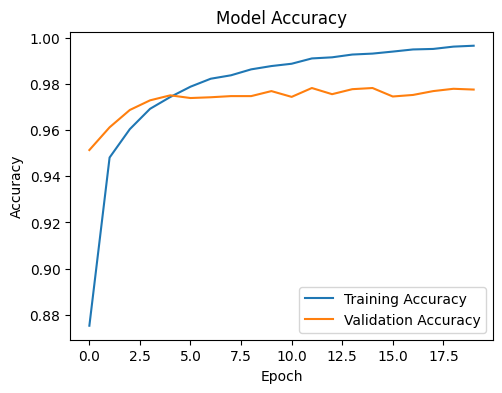

In [75]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

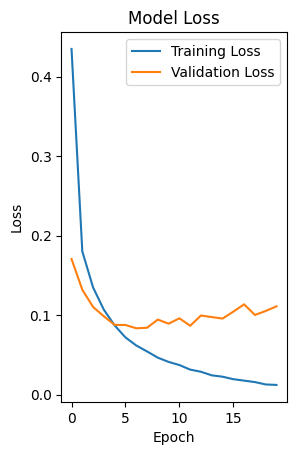

In [78]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [79]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>